In [1]:
# to manupulate data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV,RandomizedSearchCV)
# to build model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (

                              BaggingRegressor,
                              RandomForestRegressor,
                              AdaBoostRegressor,
                              GradientBoostingRegressor,

)
from xgboost import XGBClassifier
#to measure performancRegressor
from sklearn import metrics
from sklearn.metrics import (

                             r2_score,

                             mean_squared_error,
                             mean_absolute_error,
)
# to supress warning
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.Max_columns",None)
pd.set_option("display.Max_rows",None)

In [2]:
from google.colab import files
import io
try:
    uploaded
except:
    uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [3]:
data=pd.read_csv("Dataset .csv")
df=data.copy()
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [4]:
# checking shape
df.shape

(9551, 21)

- There are 9551 rows and 21 columns in dataset.


In [5]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# checking discriptive
df.describe().transpose()

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [7]:
# # checking unique values
# for i in df:
#     print(i,df[i].unique())
#     print("*"*5)

In [8]:
# checking unique values
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

- restuarant id,address,Resturant name,locality,locality verbose,lognitude,latitude,cuisine,votes has more then 1000 unique values.

## EDA

#### Restaurant ID

In [9]:
# unique values
df["Restaurant ID"].nunique()

9551

- there are 9551 unique values.

#### Restaurant Name

In [10]:
# checking top resturent
df["Restaurant Name"].nunique()

7446

- there are 7446 unique resturents.

#### Country Code

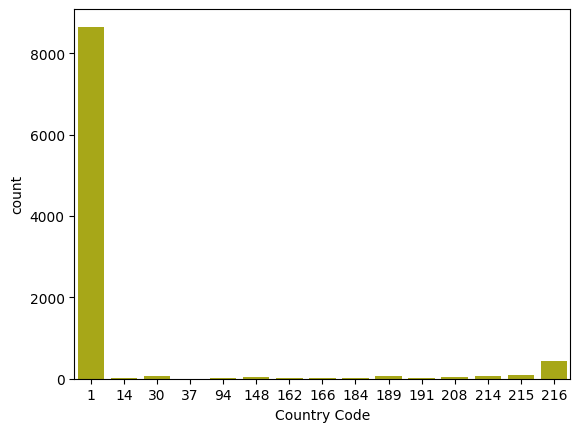

In [11]:
# checking with country code
sns.countplot(df,x="Country Code", color="y")
plt.show()

- more then 800 resturent country code start with 1 ( US, CANADA)

#### City

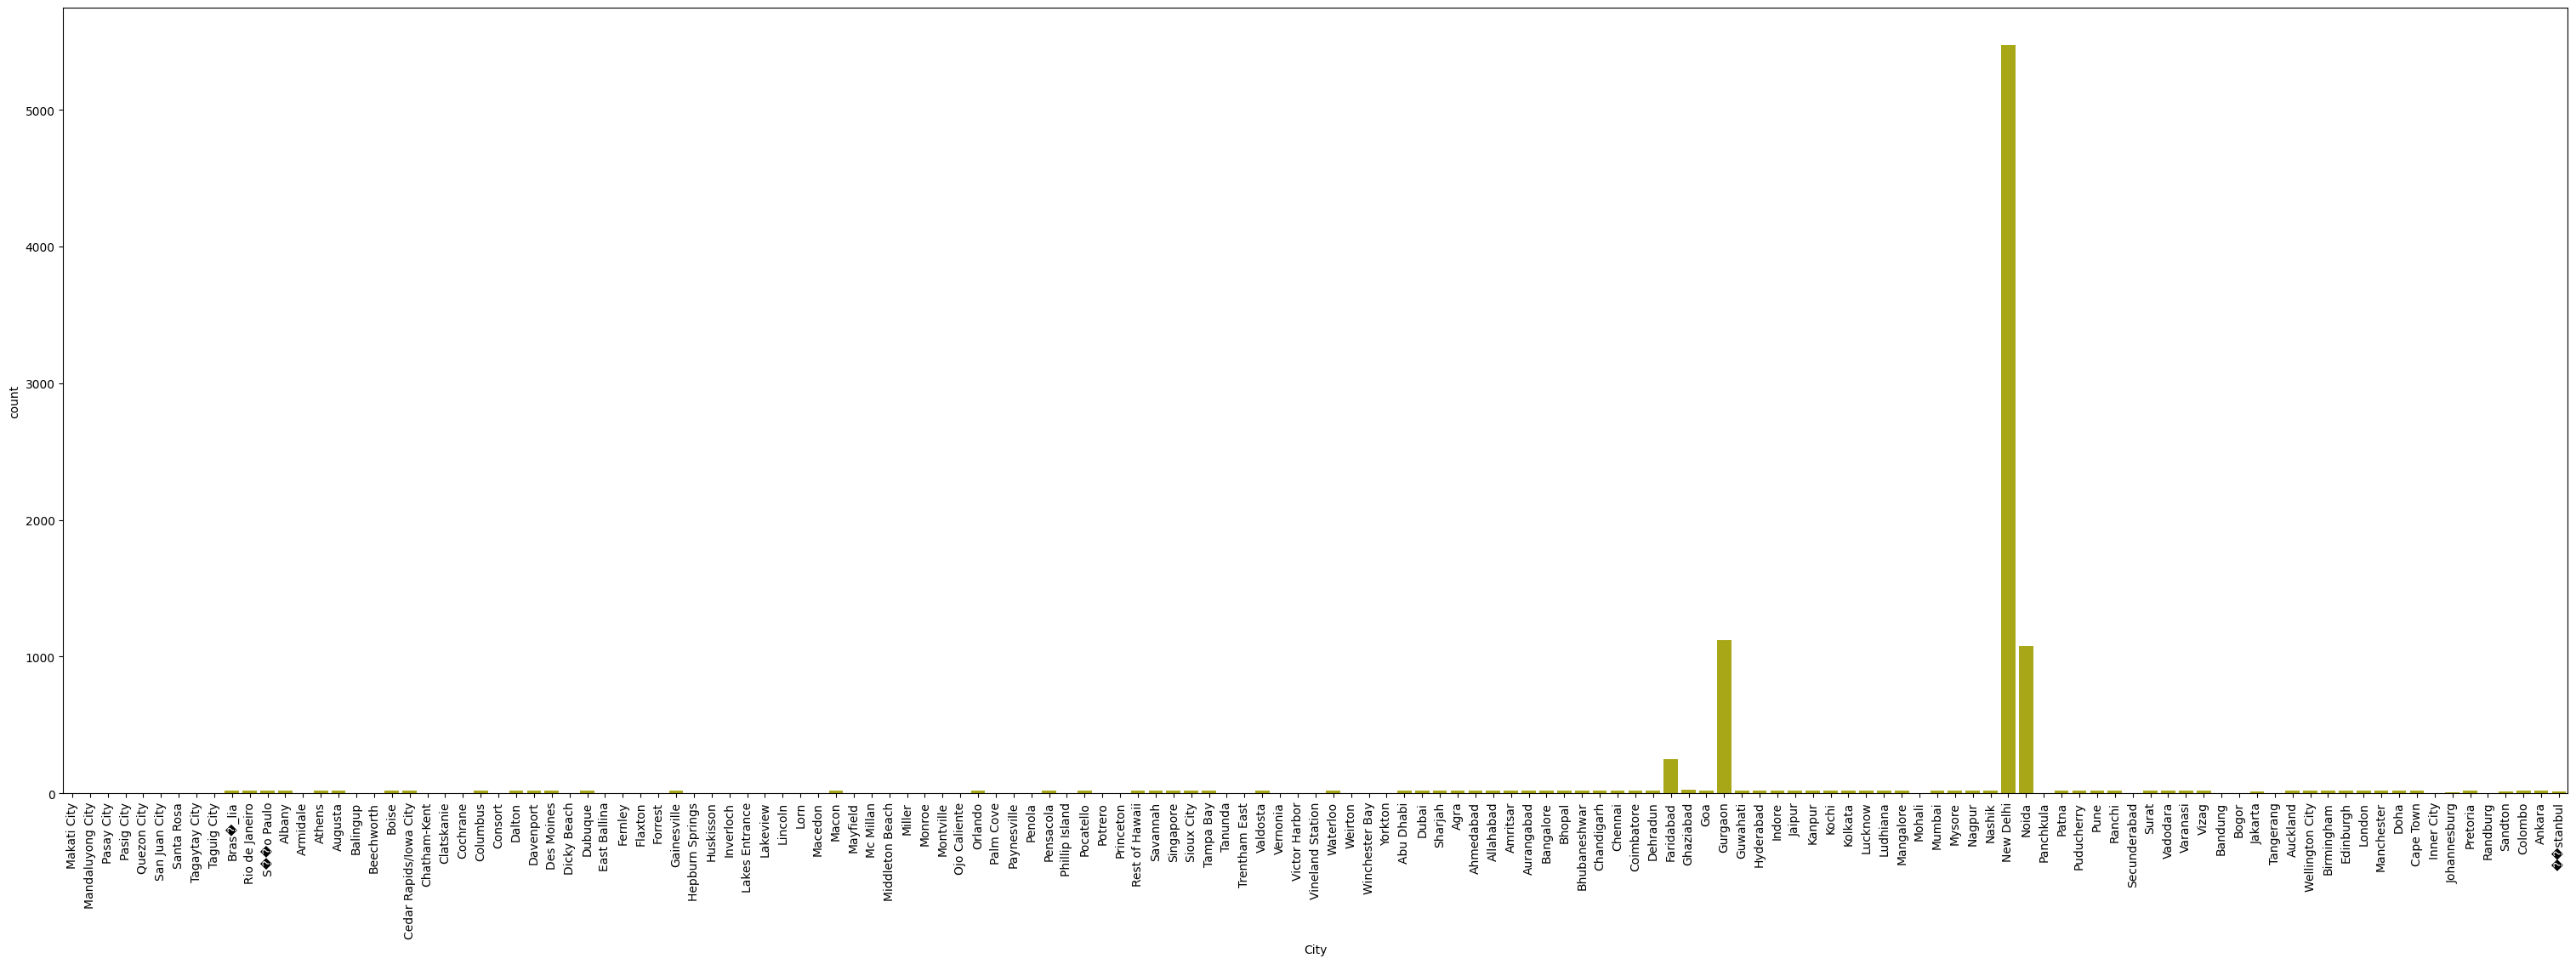

In [12]:
# checking top city
plt.figure(figsize=(38,12))
plt.xticks(rotation=90)
sns.countplot(df,x="City", color="y")
plt.show()

- top city is Delhi,Noida,gurugram,faridabad.

#### Address

In [13]:
# checking top addresses
print(df.Address.nunique())
df.Address.value_counts()[:10]

8918


Address
Dilli Haat, INA, New Delhi                                                    11
Sector 41, Noida                                                              11
Greater Kailash (GK) 1, New Delhi                                             10
The Imperial, Janpath, New Delhi                                               9
Cyber Hub, DLF Cyber City, Gurgaon                                             8
Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida     8
HUDA Market, Sector 56, Gurgaon                                                8
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi            8
The Lalit, Barakhamba Avenue, Barakhamba Road, New Delhi                       8
The Taj Mahal Hotel, 1, Mansingh Road, New Delhi                               7
Name: count, dtype: int64

- there are 8918 unique address.
- Dilli Haat, INA, New Delhi followed by sector 41 Noida ,Greater Kailash (GK) 1, New Delhi and so on.

#### Locality

In [14]:
# checking top 10 locality

df["Locality"].value_counts()[:10]

Locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
Pitampura               85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: count, dtype: int64

- top locality is Connaught Place, Rajouri Garden, Shahdara, Defence Colony and so on so forth.

#### Longitude

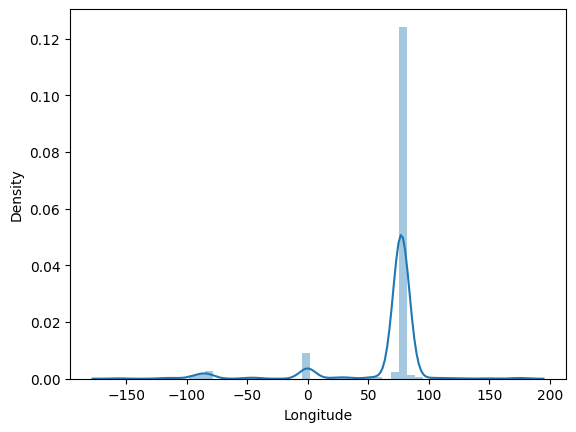

In [15]:
sns.distplot(df["Longitude"])
plt.show()

#### Latitude

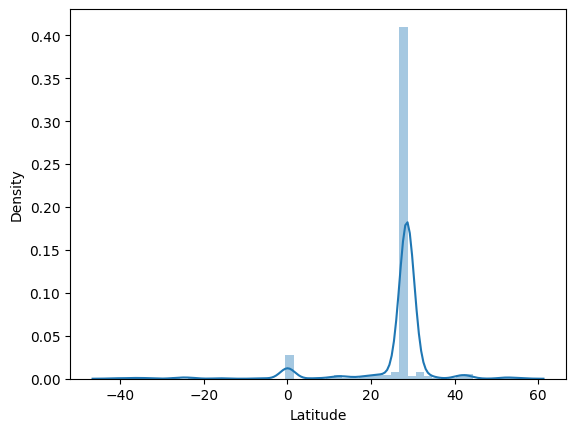

In [16]:
sns.distplot(df["Latitude"])
plt.show()

#### Cuisines

In [17]:
# checking most popular cuisine types
df["Cuisines"].value_counts()[:10]

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

- top cuisine type is North Indian followed by (North Indian, Chinese)  , chiniese , fast food, North Indian, Mughlai.

#### Average Cost for two

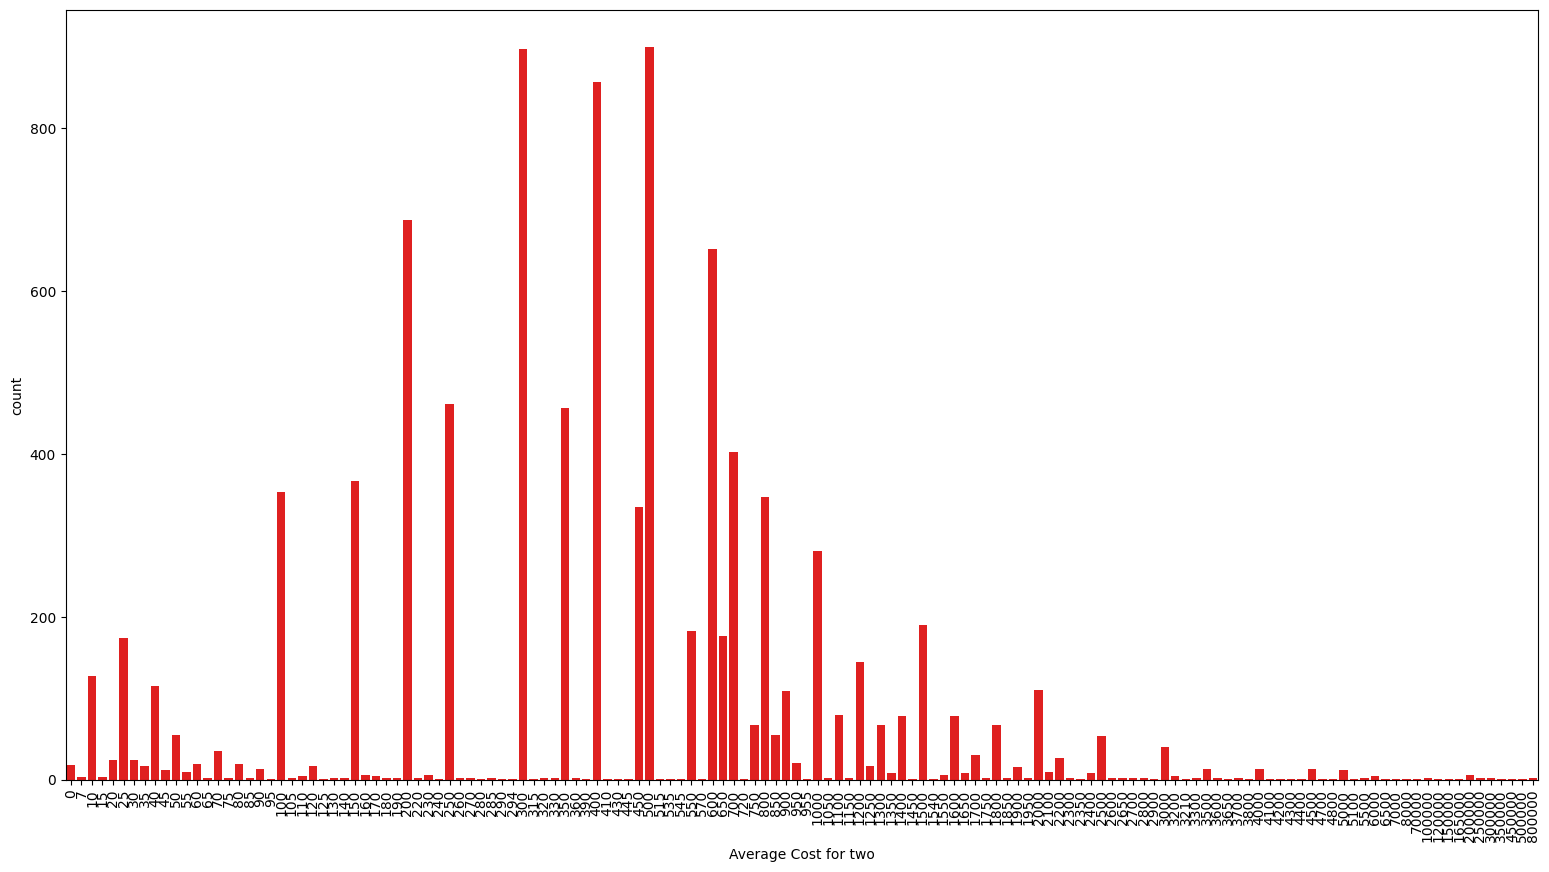

In [18]:
# checking
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)
sns.countplot(df,x="Average Cost for two",color="r")
plt.show()

#### Has Table booking

In [19]:
# checking WtAS table booking or no
df["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

- 8393 resturent don't has table booking and 1158 resturent has table booking.

#### Has Online delivery

In [20]:
# checking was delivery online or offline
df["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

- 2451 delivery has online delivery rest of the delivery was offline.

#### Is delivering now

In [21]:
# checking is delering feature
df['Is delivering now'].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

- there was 34 order has been delivering.

#### Switch to order menu

In [22]:
df["Switch to order menu"].value_counts()

Switch to order menu
No    9551
Name: count, dtype: int64

- Switch to order menu has all no values.we will remove it later.

#### Price range

In [23]:
# checking price range
df["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

- there 4 unique values in this feature 4444, 3113, 1408, 586.

#### Aggregate rating

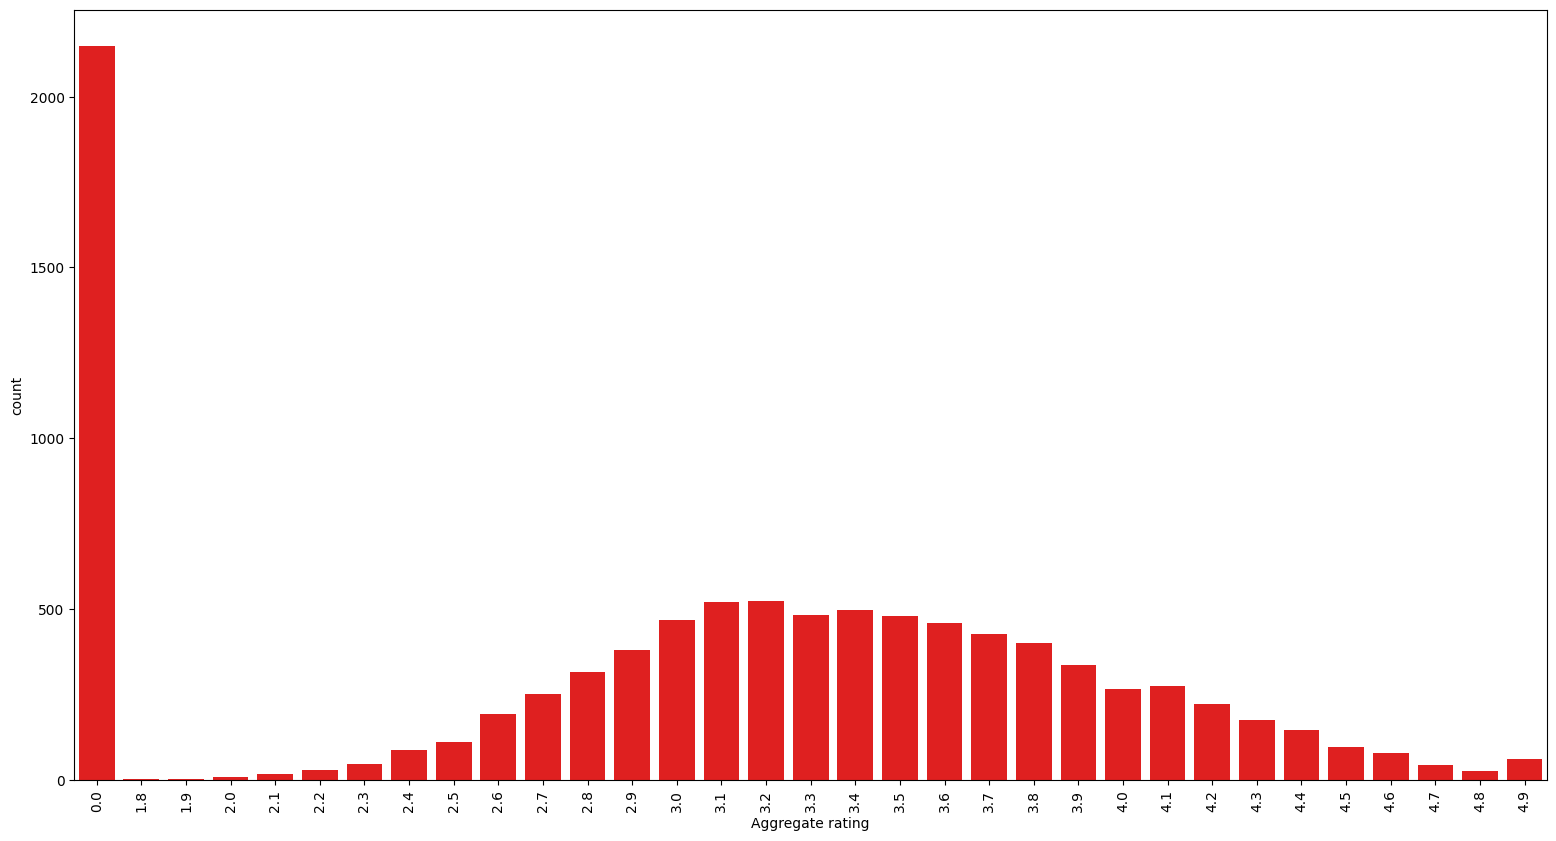

In [24]:
# checking aggration rating
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)
sns.countplot(df,x="Aggregate rating",color="r")
plt.show()

- most of aggregate rating is between 2.5 to 4.5
- aggregate rating is looking normally distributed.

#### Rating color

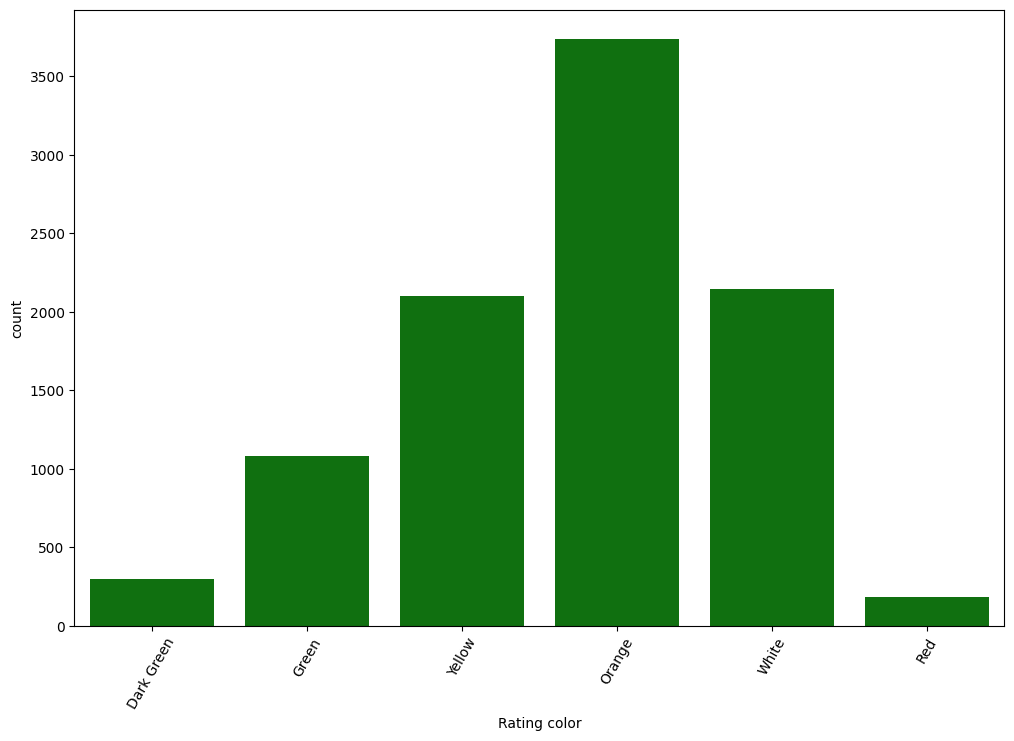

In [25]:
# checking rating color
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
sns.countplot(df,x="Rating color",color="g")
plt.show()

- Rating color is Orange, white, yellow, Green, Red, Dark green.
- most of the rating color is Orange followed by white, Yellow, green .


#### Rating text

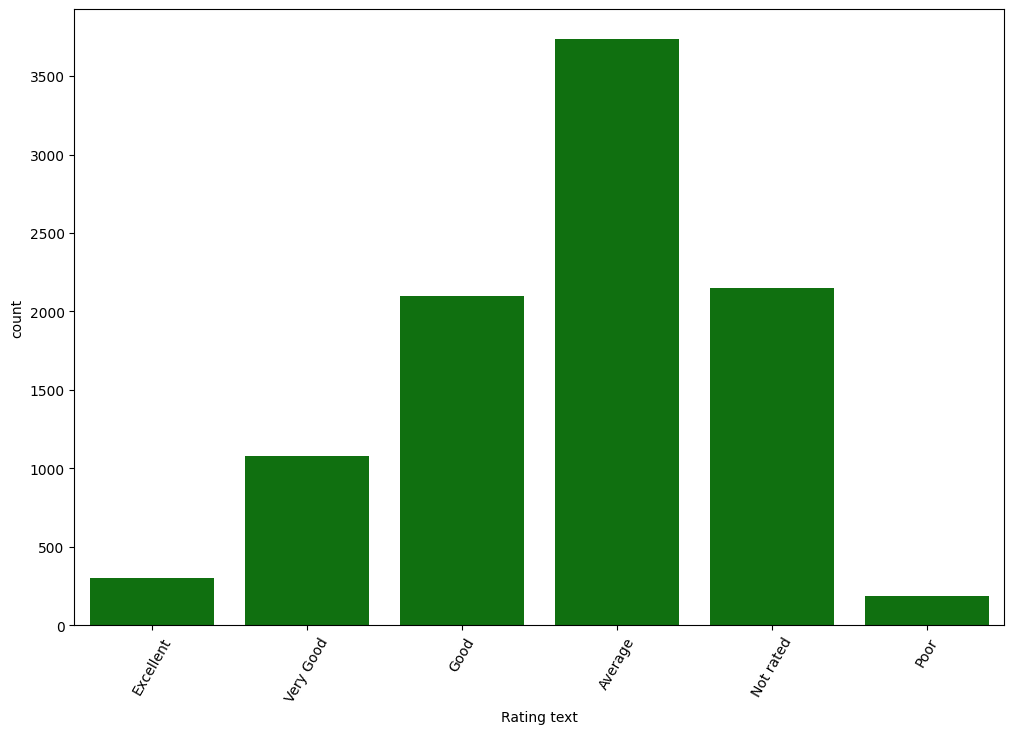

In [26]:
# checking rating text
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
sns.countplot(df,x="Rating text",color="g")
plt.show()

- Rating text is Excellent, Very good, Good, Average, Not rated, Poor.
- most of the getting rating text is average.

#### Votes

In [27]:
# checking vote
df["Votes"].unique()[:10]

array([314, 591, 270, 365, 229, 336, 520, 677, 621, 532])

- in votes feature top is 314,591,270,365,229,336 .

In [28]:
# checking the locations of restaurants on a map using latitude and longitude
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Restaurant Name",
                        zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


## 1. Which restaurants have the highest aggregate rating and - what common factors contribute to their success?

In [29]:

# Sort the DataFrame by Aggregate rating in descending order
top_rated_restaurants = df.sort_values(by='Aggregate rating', ascending=False).head(10)

# Display the top 10 restaurants with the highest aggregate rating
print(top_rated_restaurants[['Restaurant Name', 'Aggregate rating', 'Cuisines', 'Price range', 'Has Table booking', 'Has Online delivery']])

# Analyze common factors contributing to high ratings
print("\nFactors contributing to high ratings:")
print(top_rated_restaurants['Cuisines'].value_counts())
print(top_rated_restaurants['Price range'].value_counts())
print(top_rated_restaurants['Has Table booking'].value_counts())
print(top_rated_restaurants['Has Online delivery'].value_counts())


                    Restaurant Name  Aggregate rating  \
1381                    Caterspoint               4.9   
589         AB's Absolute Barbecues               4.9   
374   McGuire's Irish Pub & Brewery               4.9   
9303                          Miann               4.9   
9299                          Milse               4.9   
9296               Talaga Sampireun               4.9   
50                Garota de Ipanema               4.9   
9291               Talaga Sampireun               4.9   
48               Braseiro da G��vea               4.9   
428               Mama's Fish House               4.9   

                             Cuisines  Price range Has Table booking  \
1381  Mexican, American, Healthy Food            2                No   
589               Continental, Indian            3               Yes   
374           Burger, Bar Food, Steak            3                No   
9303                         Desserts            1                No   
9299        

- most of the resturent has 4.9 rating. and has no table booking and paid offline.

## 2. What is the relationship between the price range and the restaurant ratings?

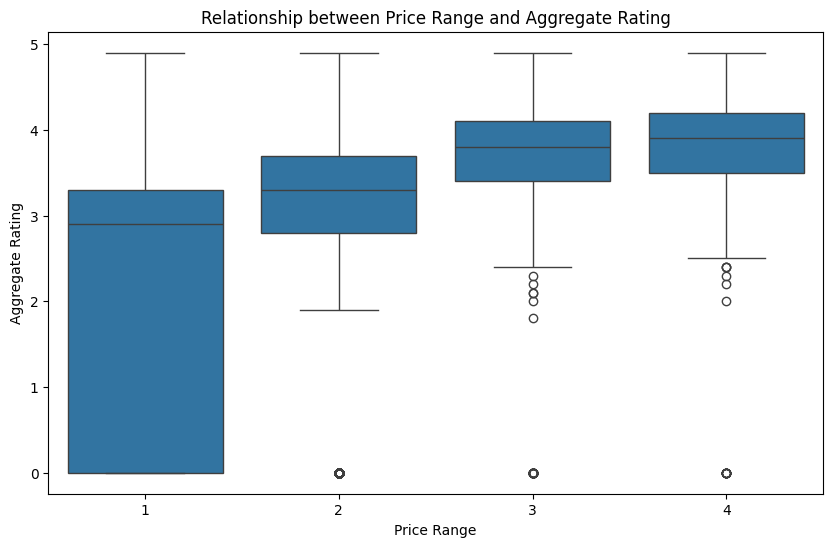

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [30]:

# Create a box plot to visualize the relationship between price range and aggregate rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Relationship between Price Range and Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

# Calculate the average aggregate rating for each price range
price_range_rating = df.groupby('Price range')['Aggregate rating'].mean()
print(price_range_rating)


- price range is increasing and aggregrating rating is also increasing.because if they pay more they get more quality food.

## 3. Which cities have the highest concentration of top-rated restaurants?

City
New Delhi         17
Rio de Janeiro    10
London            10
Gurgaon            9
Orlando            8
Bangalore          7
Auckland           7
Tampa Bay          7
Abu Dhabi          6
Hyderabad          6
Name: count, dtype: int64


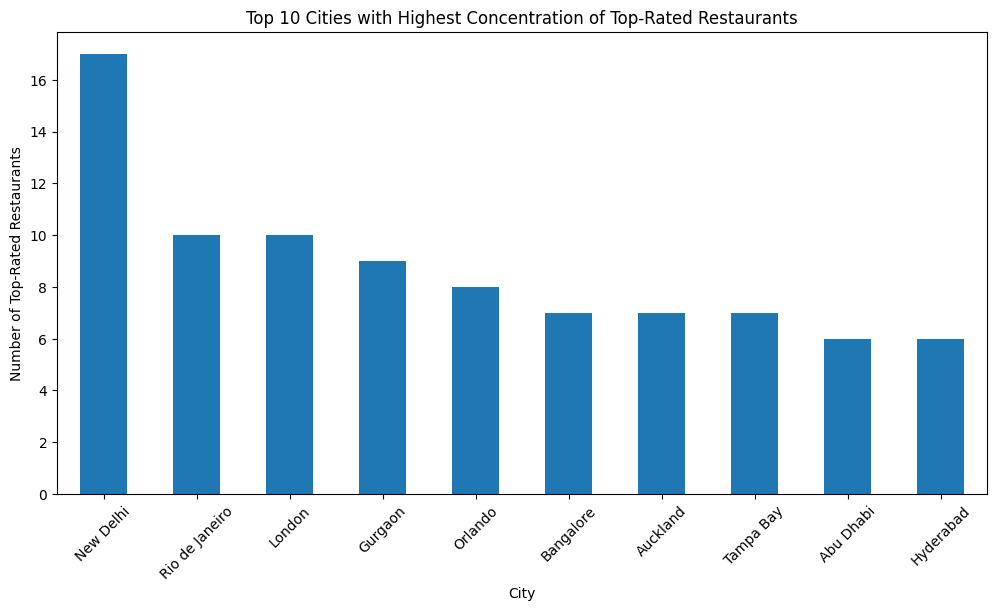

In [31]:

# Filter restaurants with aggregate rating above 4.5
top_rated_restaurants = df[df['Aggregate rating'] > 4.5]

# Count the number of top-rated restaurants in each city
city_counts = top_rated_restaurants['City'].value_counts()

# Print the top 10 cities with the highest concentration of top-rated restaurants
print(city_counts[:10])

# Visualize the top cities with the highest concentration of top-rated restaurants
plt.figure(figsize=(12, 6))
city_counts[:10].plot(kind='bar')
plt.title('Top 10 Cities with Highest Concentration of Top-Rated Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Top-Rated Restaurants')
plt.xticks(rotation=45)
plt.show()


- New delhi followed by Rio de janeiro, london, gurgaon and so on.

## 4. How does location affect the number of votes or ratings a restaurant receives?

City
Bangalore    2805.750000
Kolkata      2229.650000
Mumbai       1484.850000
Chennai      1384.750000
Tampa Bay    1370.350000
Hyderabad    1340.833333
Orlando      1199.450000
Tangerang    1183.500000
Pune         1036.600000
Bogor         971.000000
Name: Votes, dtype: float64


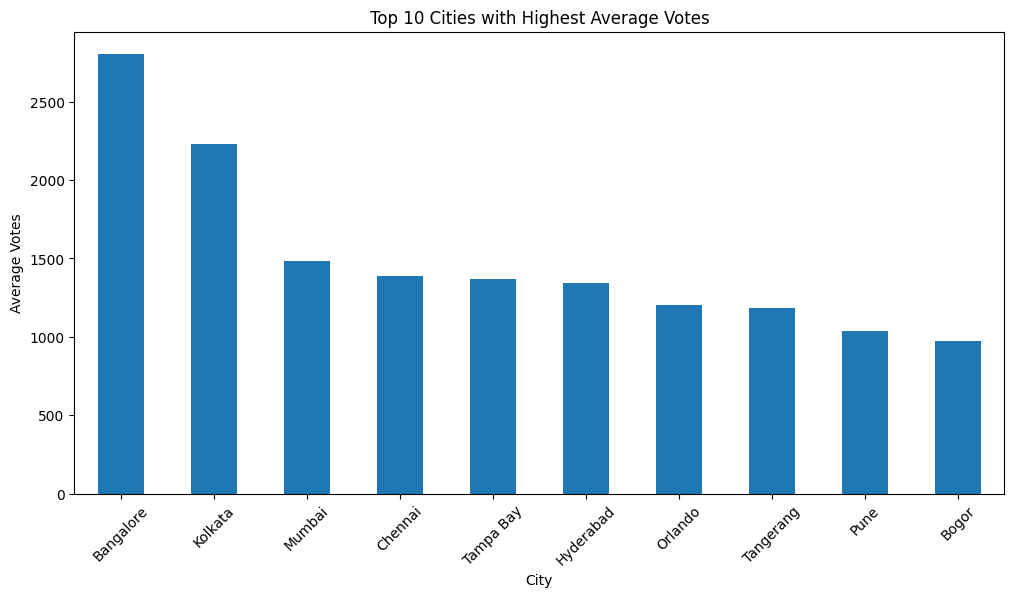

In [32]:

# Calculate the average number of votes for each city
city_votes = df.groupby('City')['Votes'].mean()

# Sort the cities by average votes in descending order
city_votes_sorted = city_votes.sort_values(ascending=False)

# Print the top 10 cities with the highest average votes
print(city_votes_sorted[:10])

# Visualize the relationship between location and votes
plt.figure(figsize=(12, 6))
city_votes_sorted[:10].plot(kind='bar')
plt.title('Top 10 Cities with Highest Average Votes')
plt.xlabel('City')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()

# -  Location plays a significant role in the number of votes a restaurant receives. Cities with a higher concentration of restaurants and a more active population tend to have restaurants with more votes.


- Banglore kolkata, mumbai, channai cities resturent get often rating.

## 5. Which cuisines are most popular based on ratings and votes?

In [33]:
# prompt: Which cuisines are most popular based on ratings and votes?

# Group the data by cuisine and calculate the average rating and total votes for each cuisine
cuisine_popularity = df.groupby('Cuisines').agg({'Aggregate rating': 'mean', 'Votes': 'sum'})

# Sort the cuisines by average rating in descending order
cuisine_popularity_sorted_by_rating = cuisine_popularity.sort_values(by='Aggregate rating', ascending=False)

# Print the top 10 cuisines with the highest average rating
print(cuisine_popularity_sorted_by_rating.head(10))

# Sort the cuisines by total votes in descending order
cuisine_popularity_sorted_by_votes = cuisine_popularity.sort_values(by='Votes', ascending=False)

# Print the top 10 cuisines with the highest total votes
print(cuisine_popularity_sorted_by_votes.head(10))


                          Aggregate rating  Votes
Cuisines                                         
Italian, Deli                          4.9   1424
Hawaiian, Seafood                      4.9   1343
American, Sandwich, Tea                4.9   1457
Continental, Indian                    4.9    641
European, Asian, Indian                4.9    621
European, Contemporary                 4.9    441
European, German                       4.9   1413
BBQ, Breakfast, Southern               4.9    249
American, Coffee and Tea               4.9    570
Sunda, Indonesian                      4.9   5514
                                Aggregate rating  Votes
Cuisines                                               
North Indian, Mughlai                   2.888623  53747
North Indian                            1.672329  46241
North Indian, Chinese                   2.421722  42012
Cafe                                    2.890970  30657
Chinese                                 2.042090  21925
North In

- based on rating and votes top cuisine

(Italian, Deli) , (Hawaiian, Seafood), (American, Sandwich, Tea)

## 6. Do restaurants that offer table booking or online delivery receive better ratings or more votes?

In [34]:


# Group the data by 'Has Table booking' and calculate the average rating and total votes for each group
table_booking_stats = df.groupby('Has Table booking').agg({'Aggregate rating': 'mean', 'Votes': 'sum'})

print(table_booking_stats)

# Group the data by 'Has Online delivery' and calculate the average rating and total votes for each group
online_delivery_stats = df.groupby('Has Online delivery').agg({'Aggregate rating': 'mean', 'Votes': 'sum'})

print(online_delivery_stats)

# - Restaurants with online delivery tend to have a slightly higher average rating and more votes compared to those without online delivery.
# - Restaurants with table booking tend to have a slightly higher average rating and more votes compared to those without table booking.


                   Aggregate rating    Votes
Has Table booking                           
No                         2.559359  1089748
Yes                        3.441969   408897
                     Aggregate rating   Votes
Has Online delivery                          
No                           2.465296  980731
Yes                          3.248837  517914


- restaurants that offer table booking or online delivery receive better ratings and less votes.

## 7. How does offering delivery impact restaurant popularity in different cities?

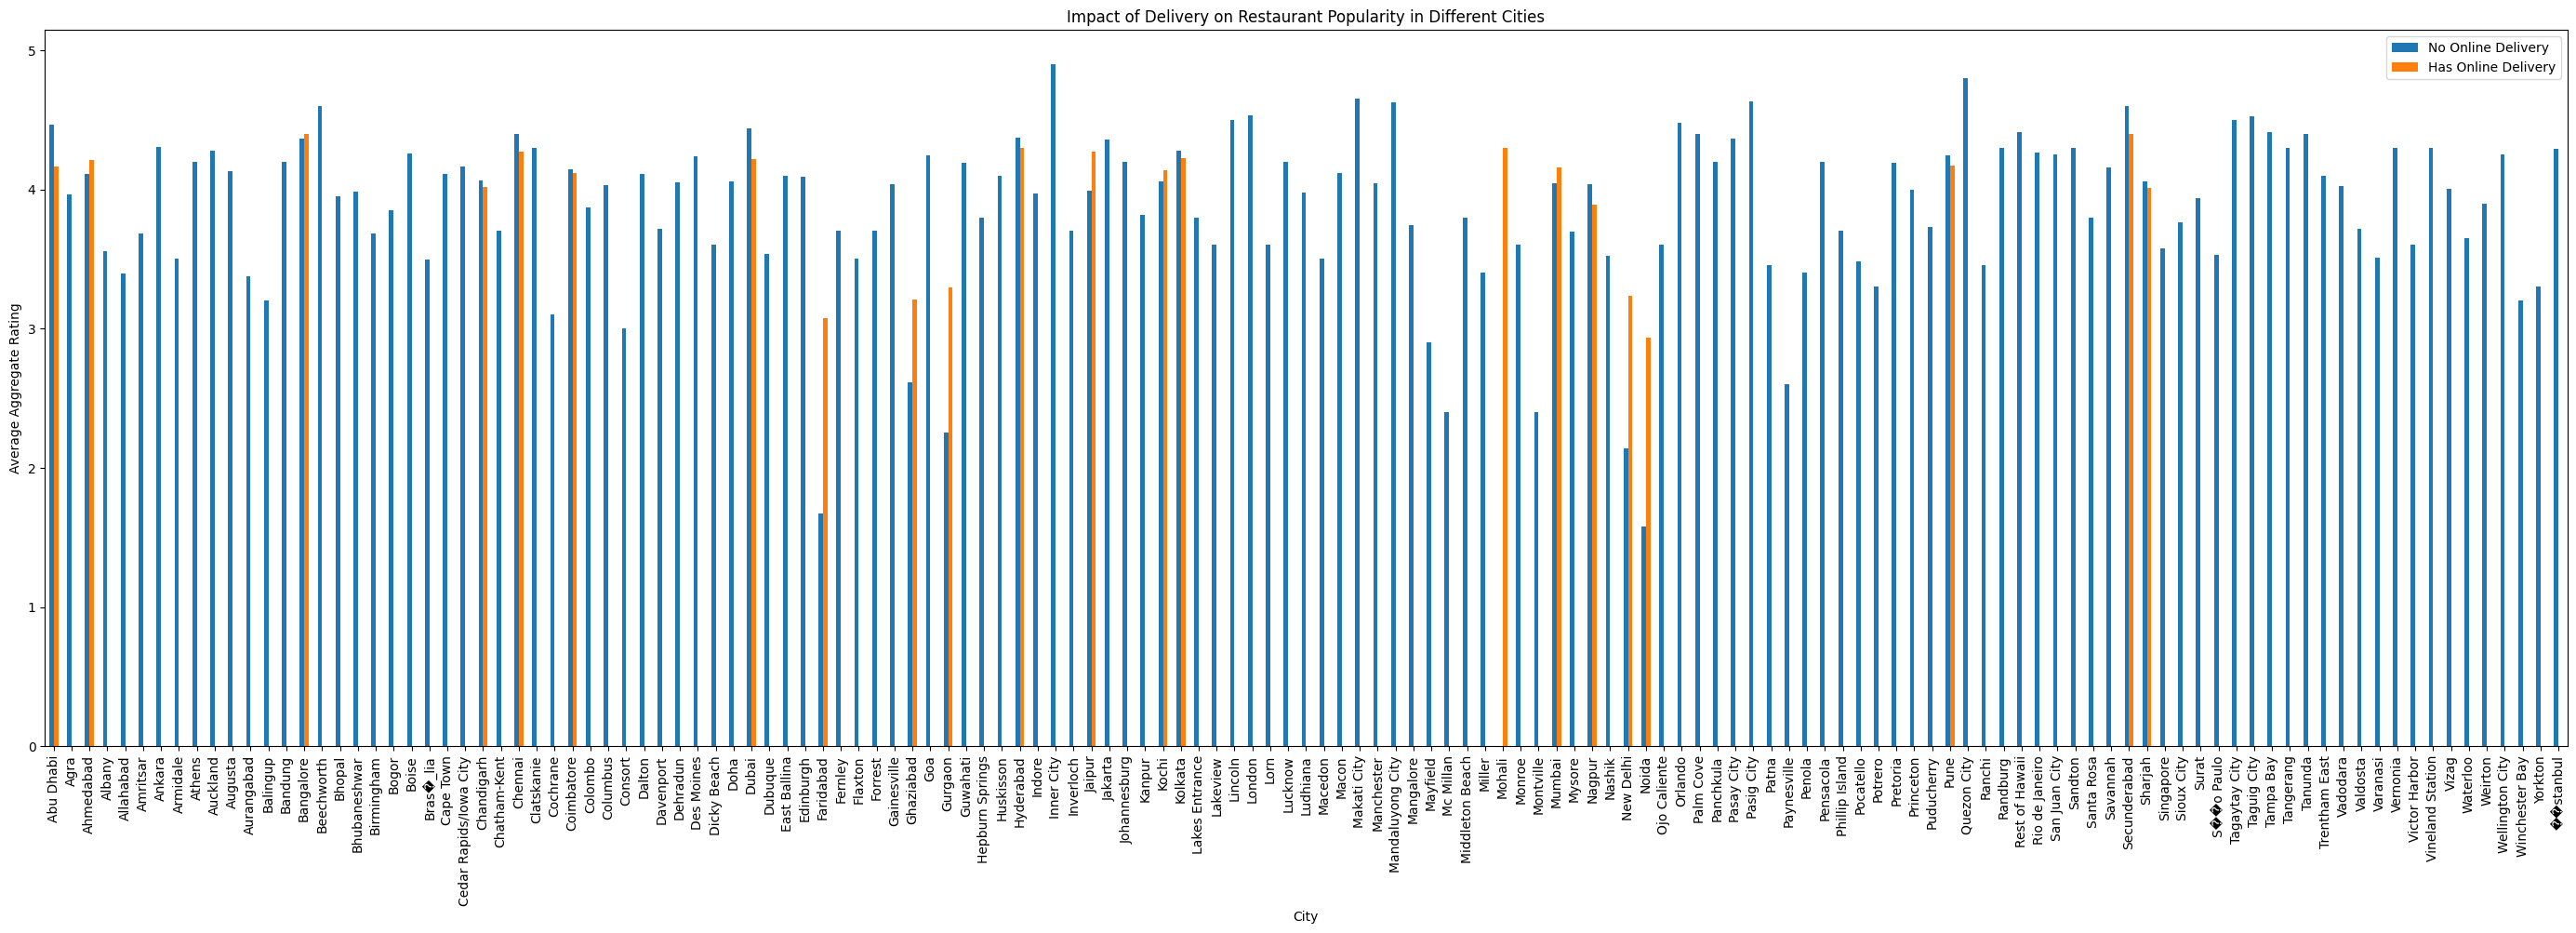

In [35]:

# Group the data by 'City' and 'Has Online delivery' and calculate the average rating and total votes for each group
city_delivery_stats = df.groupby(['City', 'Has Online delivery'])['Aggregate rating'].mean().unstack()

# Visualize the impact of delivery on restaurant popularity in different cities
city_delivery_stats.plot(kind='bar', figsize=(35, 10))
plt.title('Impact of Delivery on Restaurant Popularity in Different Cities')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.legend(['No Online Delivery', 'Has Online Delivery'])
plt.show()


- most of the resturent has not deliverying online.but online delivering giving more popularity.

## 8. Which countries have the highest-rated restaurants?

Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
Name: Aggregate rating, dtype: float64


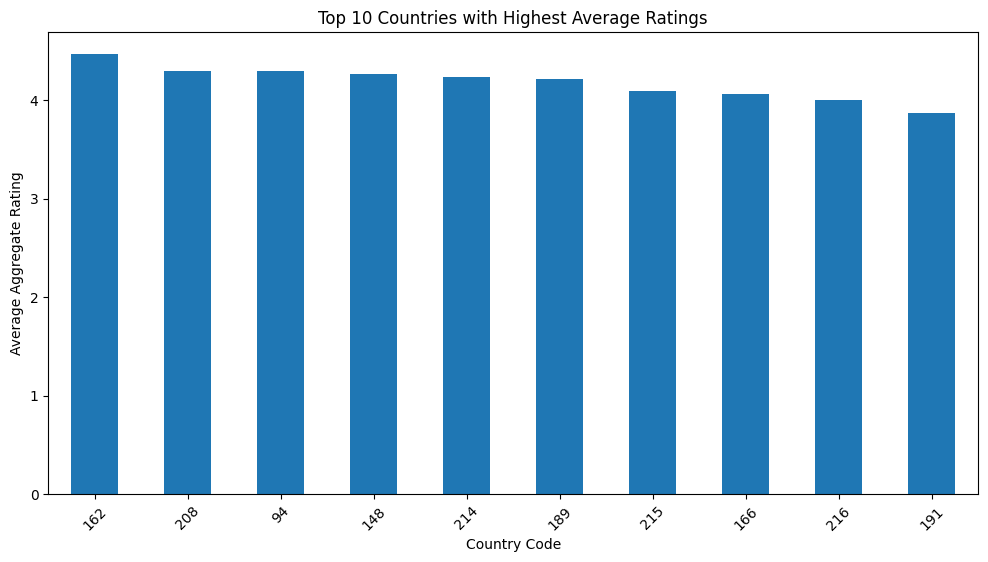

In [36]:


import matplotlib.pyplot as plt
# Group the data by 'Country Code' and calculate the average rating for each country
country_ratings = df.groupby('Country Code')['Aggregate rating'].mean()

# Sort the countries by average rating in descending order
country_ratings_sorted = country_ratings.sort_values(ascending=False)

# Print the top 10 countries with the highest average ratings
print(country_ratings_sorted[:10])

# Visualize the top countries with the highest average ratings
plt.figure(figsize=(12, 6))
country_ratings_sorted[:10].plot(kind='bar')
plt.title('Top 10 Countries with Highest Average Ratings')
plt.xlabel('Country Code')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()


-  top  country code is 162 followed by 208,94,328 .

## 9. Is there a difference in customer satisfaction based on country or location?

In [37]:
group=df.groupby('Country Code')['Aggregate rating'].mean()
group


Country Code
1      2.523324
14     3.658333
30     3.763333
37     3.575000
94     4.295238
148    4.262500
162    4.468182
166    4.060000
184    3.575000
189    4.210000
191    3.870000
208    4.300000
214    4.233333
215    4.087500
216    4.004378
Name: Aggregate rating, dtype: float64

- yes different country has different rating.

In [38]:
city=df.groupby('City')['Aggregate rating'].mean()
city

City
Abu Dhabi                 4.300000
Agra                      3.965000
Ahmedabad                 4.161905
Albany                    3.555000
Allahabad                 3.395000
Amritsar                  3.685714
Ankara                    4.305000
Armidale                  3.500000
Athens                    4.200000
Auckland                  4.275000
Augusta                   4.130000
Aurangabad                3.375000
Balingup                  3.200000
Bandung                   4.200000
Bangalore                 4.375000
Beechworth                4.600000
Bhopal                    3.950000
Bhubaneshwar              3.980952
Birmingham                3.680000
Bogor                     3.850000
Boise                     4.260000
Bras�_lia                 3.495000
Cape Town                 4.110000
Cedar Rapids/Iowa City    4.165000
Chandigarh                4.050000
Chatham-Kent              3.700000
Chennai                   4.315000
Clatskanie                4.300000
Cochrane                  3.100000
Coimbatore                4.135000
Colombo                   3.870000
Columbus                  4.030000
Consort                   3.000000
Dalton                    4.110000
Davenport                 3.715000
Dehradun                  4.050000
Des Moines                4.235000
Dicky Beach               3.600000
Doha                      4.060000
Dubai                     4.370000
Dubuque                   3.535000
East Ballina              4.100000
Edinburgh                 4.090000
Faridabad                 1.866932
Fernley                   3.700000
Flaxton                   3.500000
Forrest                   3.700000
Gainesville               4.035000
Ghaziabad                 2.852000
Goa                       4.245000
Gurgaon                   2.651431
Guwahati                  4.190476
Hepburn Springs           3.800000
Huskisson                 4.100000
Hyderabad                 4.344444
Indore                    3.970000
Inner City                4.900000
Inverloch                 3.700000
Jaipur                    4.130000
Jakarta                   4.356250
Johannesburg              4.200000
Kanpur                    3.815000
Kochi                     4.080000
Kolkata                   4.255000
Lakes Entrance            3.800000
Lakeview                  3.600000
Lincoln                   4.500000
London                    4.535000
Lorn                      3.600000
Lucknow                   4.195238
Ludhiana                  3.980000
Macedon                   3.500000
Macon                     4.115000
Makati City               4.650000
Manchester                4.045000
Mandaluyong City          4.625000
Mangalore                 3.745000
Mayfield                  2.900000
Mc Millan                 2.400000
Middleton Beach           3.800000
Miller                    3.400000
Mohali                    4.300000
Monroe                    3.600000
Montville                 2.400000
Mumbai                    4.085000
Mysore                    3.695000
Nagpur                    3.965000
Nashik                    3.520000
New Delhi                 2.438845
Noida                     2.036204
Ojo Caliente              3.600000
Orlando                   4.475000
Palm Cove                 4.400000
Panchkula                 4.200000
Pasay City                4.366667
Pasig City                4.633333
Patna                     3.455000
Paynesville               2.600000
Penola                    3.400000
Pensacola                 4.200000
Phillip Island            3.700000
Pocatello                 3.485000
Potrero                   3.300000
Pretoria                  4.190000
Princeton                 4.000000
Puducherry                3.730000
Pune                      4.220000
Quezon City               4.800000
Ranchi                    3.455000
Randburg                  4.300000
Rest of Hawaii            4.410000
Rio de Janeiro            4.265000
San Juan City             4.250000
Sandton                   4.300000
Santa

- yes different cities has different rating .

## Data Preprocessing

In [39]:
# checking duplicates
df.duplicated().sum()

0

- there are no duplicates.

In [40]:
# checking missing values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

- there is no missing values.

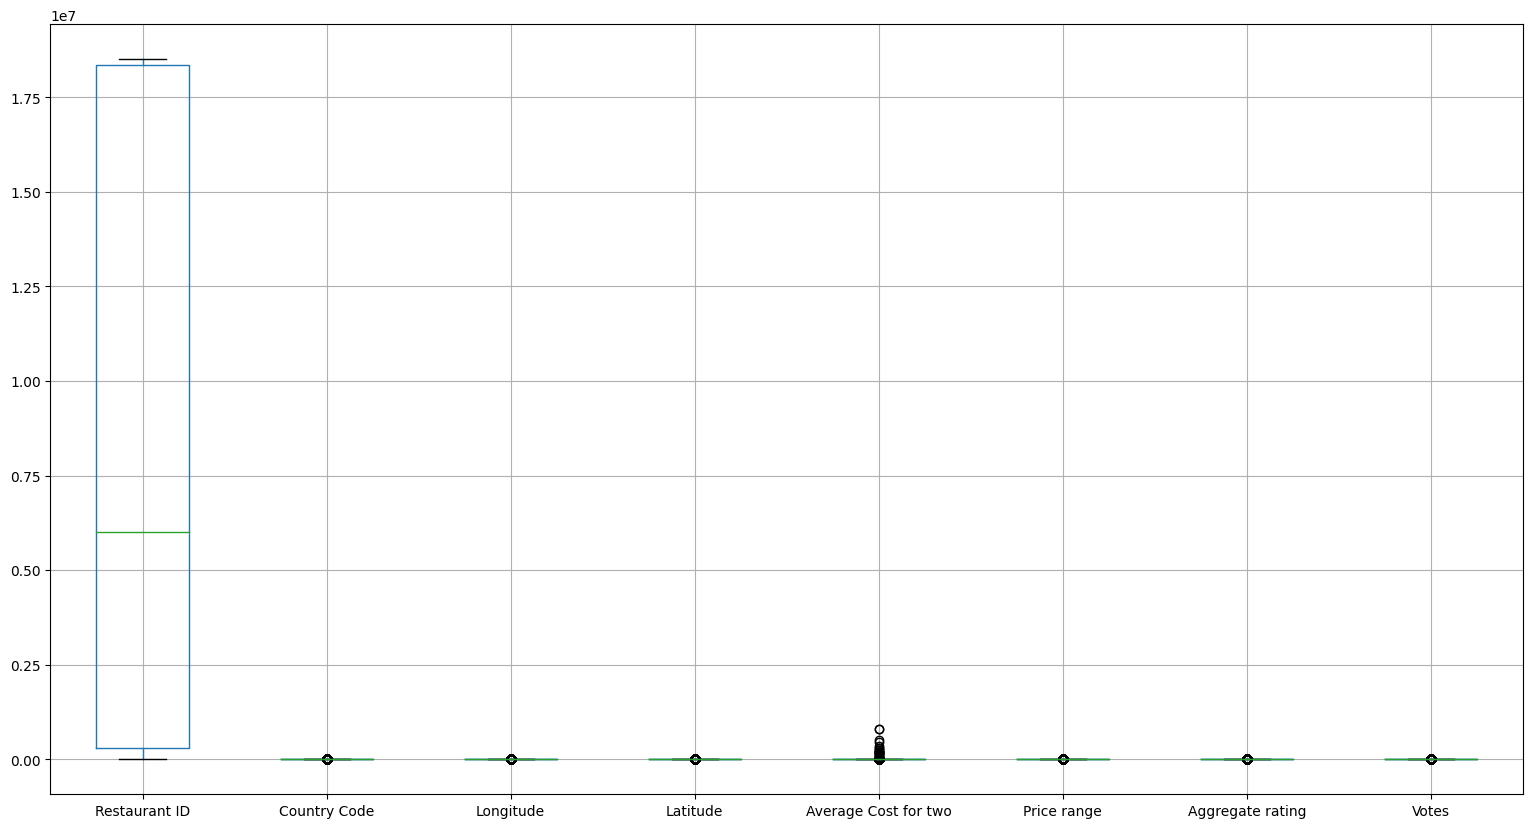

In [41]:
# checking outliers
df.boxplot(figsize=(19,10))
plt.show()

- there are few outlier.assuming all datapoint is real datapoint.

In [42]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [43]:
# Drop irrelevant columns for ML model
df = df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Rating color', 'Rating text', 'Switch to order menu'], axis=1)


In [44]:
# checking target feature
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [45]:
# copying data
df1=df.copy()

In [46]:
# independent variables
X = df1.drop(["Aggregate rating"], axis=1)
# dependent variable
y = df1[["Aggregate rating"]]
# creating dummy
X=pd.get_dummies(X)

In [47]:
# # let's add the intercept to data
# X = sm.add_constant(X)

In [48]:
# Replace True with 1 and False with 2 in X
X = X.replace({True: 1, False: 0})
X.head()

Country Code  Average Cost for two  Price range  Votes  City_Abu Dhabi  \
0           162                  1100            3    314               0   
1           162                  1200            3    591               0   
2           162                  4000            4    270               0   
3           162                  1500            4    365               0   
4           162                  1500            4    229               0   

   City_Agra  City_Ahmedabad  City_Albany  City_Allahabad  City_Amritsar  \
0          0               0            0               0              0   
1          0               0            0               0              0   
2          0               0            0               0              0   
3          0               0            0               0              0   
4          0               0            0               0              0   

   City_Ankara  City_Armidale  City_Athens  City_Auckland  City_Augusta  \
0            0              0            0              0             0   
1            0              0            0              0             0   
2            0              0            0              0             0   
3            0              0            0              0             0   
4            0              0            0              0             0   

   City_Aurangabad  City_Balingup  City_Bandung  City_Bangalore  \
0                0              0             0               0   
1                0              0             0               0   
2                0              0             0               0   
3                0              0             0               0   
4                0              0             0               0   

   City_Beechworth  City_Bhopal  City_Bhubaneshwar  City_Birmingham  \
0                0            0                  0                0   
1                0            0                  0                0   
2                0            0                  0                0   
3                0            0                  0                0   
4                0            0                  0                0   

   City_Bogor  City_Boise  City_Bras�_lia  City_Cape Town  \
0           0           0               0               0   
1           0           0               0               0   
2           0           0               0               0   
3           0           0               0               0   
4           0           0               0               0   

   City_Cedar Rapids/Iowa City  City_Chandigarh  City_Chatham-Kent  \
0                            0                0                  0   
1                            0                0                  0   
2                            0                0                  0   
3                            0                0                  0   
4                            0                0                  0   

   City_Chennai  City_Clatskanie  City_Cochrane  City_Coimbatore  \
0             0                0              0                0   
1             0                0              0                0   
2             0                0              0                0   
3             0                0              0                0   
4             0                0              0                0   

   City_Colombo  City_Columbus  City_Consort  City_Dalton  City_Davenport  \
0             0              0             0            0               0   
1             0              0             0            0               0   
2             0              0             0            0               0   
3             0              0             0            0               0   
4             0              0             0            0               0   

   City_Dehradun  City_Des Moines  City_Dicky Beach  City_Doha  City_Dubai  \
0              0                0                 0          0  

In [49]:
# spliting data
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.2,random_state=1)

In [50]:
X_train.head()

Country Code  Average Cost for two  Price range  Votes  City_Abu Dhabi  \
5944             1                   100            1      3               0   
604            214                    85            3    285               0   
6724             1                   350            1     59               0   
5274             1                   600            2     23               0   
5776             1                   100            1     10               0   

      City_Agra  City_Ahmedabad  City_Albany  City_Allahabad  City_Amritsar  \
5944          0               0            0               0              0   
604           0               0            0               0              0   
6724          0               0            0               0              0   
5274          0               0            0               0              0   
5776          0               0            0               0              0   

      City_Ankara  City_Armidale  City_Athens  City_Auckland  City_Augusta  \
5944            0              0            0              0             0   
604             0              0            0              0             0   
6724            0              0            0              0             0   
5274            0              0            0              0             0   
5776            0              0            0              0             0   

      City_Aurangabad  City_Balingup  City_Bandung  City_Bangalore  \
5944                0              0             0               0   
604                 0              0             0               0   
6724                0              0             0               0   
5274                0              0             0               0   
5776                0              0             0               0   

      City_Beechworth  City_Bhopal  City_Bhubaneshwar  City_Birmingham  \
5944                0            0                  0                0   
604                 0            0                  0                0   
6724                0            0                  0                0   
5274                0            0                  0                0   
5776                0            0                  0                0   

      City_Bogor  City_Boise  City_Bras�_lia  City_Cape Town  \
5944           0           0               0               0   
604            0           0               0               0   
6724           0           0               0               0   
5274           0           0               0               0   
5776           0           0               0               0   

      City_Cedar Rapids/Iowa City  City_Chandigarh  City_Chatham-Kent  \
5944                            0                0                  0   
604                             0                0                  0   
6724                            0                0                  0   
5274                            0                0                  0   
5776                            0                0                  0   

      City_Chennai  City_Clatskanie  City_Cochrane  City_Coimbatore  \
5944             0                0              0                0   
604              0                0              0                0   
6724             0                0              0                0   
5274             0                0              0                0   
5776             0                0              0                0   

      City_Colombo  City_Columbus  City_Consort  City_Dalton  City_Davenport  \
5944             0              0             0            0               0   
604              0              0             0            0               0   
6724             0              0             0            0               0   
5274             0              0             0            0               0   
5776             0              0             0            0    

In [51]:
X_val.head()

Country Code  Average Cost for two  Price range  Votes  City_Abu Dhabi  \
2658             1                   300            1     46               0   
3744             1                  1000            3    843               0   
2496             1                  1000            3    181               0   
2932             1                   500            2     14               0   
1015             1                   300            1      0               0   

      City_Agra  City_Ahmedabad  City_Albany  City_Allahabad  City_Amritsar  \
2658          0               0            0               0              0   
3744          0               0            0               0              0   
2496          0               0            0               0              0   
2932          0               0            0               0              0   
1015          0               0            0               0              0   

      City_Ankara  City_Armidale  City_Athens  City_Auckland  City_Augusta  \
2658            0              0            0              0             0   
3744            0              0            0              0             0   
2496            0              0            0              0             0   
2932            0              0            0              0             0   
1015            0              0            0              0             0   

      City_Aurangabad  City_Balingup  City_Bandung  City_Bangalore  \
2658                0              0             0               0   
3744                0              0             0               0   
2496                0              0             0               0   
2932                0              0             0               0   
1015                0              0             0               0   

      City_Beechworth  City_Bhopal  City_Bhubaneshwar  City_Birmingham  \
2658                0            0                  0                0   
3744                0            0                  0                0   
2496                0            0                  0                0   
2932                0            0                  0                0   
1015                0            0                  0                0   

      City_Bogor  City_Boise  City_Bras�_lia  City_Cape Town  \
2658           0           0               0               0   
3744           0           0               0               0   
2496           0           0               0               0   
2932           0           0               0               0   
1015           0           0               0               0   

      City_Cedar Rapids/Iowa City  City_Chandigarh  City_Chatham-Kent  \
2658                            0                0                  0   
3744                            0                0                  0   
2496                            0                0                  0   
2932                            0                0                  0   
1015                            0                0                  0   

      City_Chennai  City_Clatskanie  City_Cochrane  City_Coimbatore  \
2658             0                0              0                0   
3744             0                0              0                0   
2496             0                0              0                0   
2932             0                0              0                0   
1015             0                0              0                0   

      City_Colombo  City_Columbus  City_Consort  City_Dalton  City_Davenport  \
2658             0              0             0            0               0   
3744             0              0             0            0               0   
2496             0              0             0            0               0   
2932             0              0             0            0               0   
1015             0              0             0            0    

In [52]:
# Define a scorer using make_scorer
scorer = metrics.make_scorer(metrics.mean_absolute_error)

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingRegressor(random_state=1)))
models.append(("Random forest", RandomForestRegressor(random_state=1)))
models.append(("GBM", GradientBoostingRegressor(random_state=1)))
models.append(("Adaboost", AdaBoostRegressor(random_state=1)))
models.append(("Linear regression", LinearRegression()))  # Corrected LinearRegression
models.append(("Decision Tree", DecisionTreeRegressor(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = KFold(
        n_splits=4, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, -cv_result.mean()))  # Taking negative of mean squared error to get positive value

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = mean_squared_error(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation Performance:

Bagging: 0.1070669583757411
Random forest: 0.1019125098184381
GBM: 0.10139505245477093
Adaboost: 0.13055535831135417
Linear regression: 1.5864856304231556
Decision Tree: 0.1600690354130308

Validation Performance:

Bagging: 0.10872630743654355
Random forest: 0.10447309376237204
GBM: 0.10873314187015422
Adaboost: 0.14339406529866025
Linear regression: 1.5948704477391569
Decision Tree: 0.17895755526468873


- Bagging is performing well.

## Model tuning

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor

# Define the model
model = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring='neg_mean_squared_error', cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, -randomized_cv.best_score_))


Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.11473596868425162:
CPU times: user 18 s, sys: 2.8 s, total: 20.8 s
Wall time: 5min 59s


In [55]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the model
model = RandomForestRegressor(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), 'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring='neg_mean_squared_error', cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, -randomized_cv.best_score_))


Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.14200906458752835:
CPU times: user 22.2 s, sys: 461 ms, total: 22.7 s
Wall time: 3min 39s


In [56]:
# Train the Bagging model with the best parameters
best_bagging_model = BaggingRegressor(
    random_state=1, max_samples=1, max_features=0.9, n_estimators=70
)
best_bagging_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = best_bagging_model.predict(X_train)

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", train_mse)

# Predict on the validation set
y_val_pred = best_bagging_model.predict(X_val)

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print("Validation MSE:", val_mse)


Training MSE: 2.333744793781386
Validation MSE: 2.377455433272785


- mean square error in train and test is 2.3,2.3

## Pipeline

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and BaggingRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('bagging', BaggingRegressor(random_state=1, max_samples=1, max_features=0.9, n_estimators=70))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the validation set
y_test_pred = pipeline.predict(X_test)

# Evaluate the model on the validation set
test_mse = mean_squared_error(y_test, y_test_pred)
print("Validation MSE:", test_mse)


Validation MSE: 2.377455433272785


- mse    
         Train set  2.33
         Val set    2.37
         Test set   2.37

## Insight and business recommendation

- Price range and aggregate rating have a positive
  correlation.
- Restaurants should consider their pricing
 strategy in relation to the quality of food and service to
 improve customer satisfaction and ratings.

- Cities with a higher concentration of restaurants and a more active population tend to have restaurants with more votes.
- Restaurants in popular cities should focus on marketing and online presence to attract more customers and increase visibility.

- Restaurants with online delivery tend to have a slightly higher average rating and more votes.
- Restaurants should prioritize online delivery options to expand their reach and cater to a wider audience.

- Certain cuisines consistently receive higher ratings and votes.
- Restaurants should focus on popular cuisines or explore innovative combinations to attract customers.

- Bagging Regressor model performs well for predicting aggregate rating.
- The Bagging Regressor model can be used to predict the aggregate rating of a restaurant based on various factors like cuisines, price range, location, and online delivery options.
